# Exploring the Correlation between Solar Activities and Earth's Global Temperature

Recently, it has been one of the most mainstream news on social media or even TV programmes that Earth is gradually getting hotter and hotter. This effect is making a lot of people worried since as the Earth's global temperature increases, numerous natural disasters are also expected to come, one of which is the possibility of some major cities in the world to sink due to the rise of the sea level. 

Most people will credit the increase in global temperature to the namely Greenhouse Effect. This effect is due to the existence of certain greenhouse gasses that prompts Earth's atmosphere to "gatekeep" the heat that is supposed to be re-emitted by the Earth to the outer space. However, our team believes that there is another effect that should also be considered. One of the main source of heat on Earth is our star, Sun. Unexpectedly, the intensity of solar activity keeps varying. The level of solar activity is closely related to the number on Sunspots present on the surface of the sun.

Hence, our team is curious about certain things : 

1) Is the variation of solar activities able to be predicted? Does that repeat in a predictable manner?
2) How does the solar activity affect the global temperature of the Earth?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import seaborn as sb
import statsmodels.api as sm
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Finding Regularity of Solar Activities' Intensity

In [3]:
sunspot_data = pd.read_csv("Sunspots.csv",index_col = 1, parse_dates = True)
sunspot_data.drop(columns = 'Unnamed: 0',inplace = True)
sunspot_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3265 entries, 1749-01-31 to 2021-01-31
Data columns (total 1 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Monthly Mean Total Sunspot Number  3265 non-null   float64
dtypes: float64(1)
memory usage: 51.0 KB


In [4]:
sunspot_data.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


In [5]:
sunspot_data.describe()

,Monthly Mean Total Sunspot Number
count,3265.000000
mean,81.778775
std,67.889277
min,0.000000
25%,23.900000
50%,67.200000
75%,122.500000
max,398.200000


In [6]:
print(sunspot_data.index.is_monotonic_increasing)
sunspot_data.isnull().sum()

True


Monthly Mean Total Sunspot Number    0
dtype: int64

array([[<Axes: title={'center': 'Monthly Mean Total Sunspot Number'}>]],
      dtype=object)

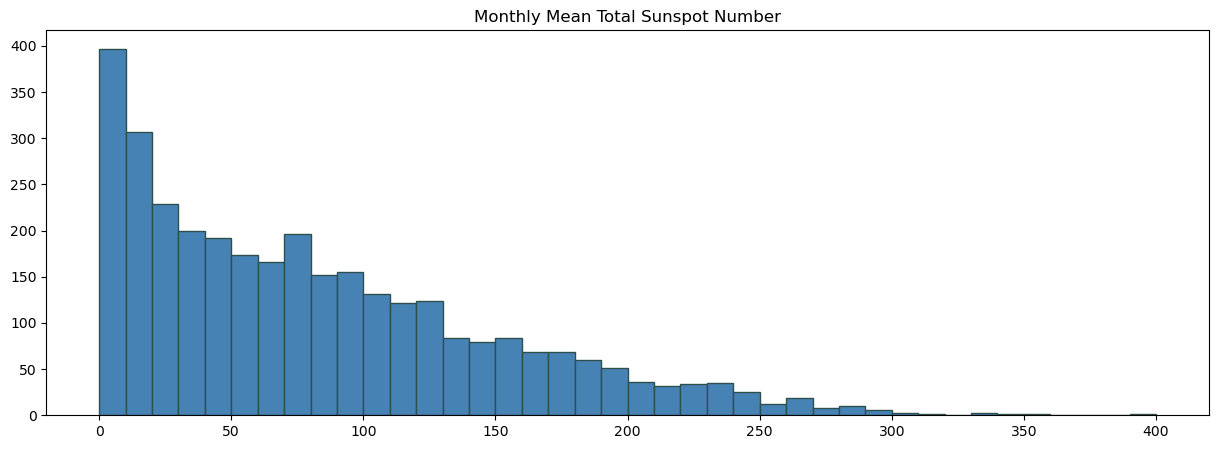

In [7]:
bins = np.arange(0,401,10)
sunspot_data.hist(bins=bins, figsize = (15,5), color = 'steelblue', edgecolor = 'darkslategrey', grid = False)

## Observing a Pattern from Number of Sunspots

<Axes: xlabel='Month (in a year)', ylabel='Monthly Mean Total Sunspot Number'>

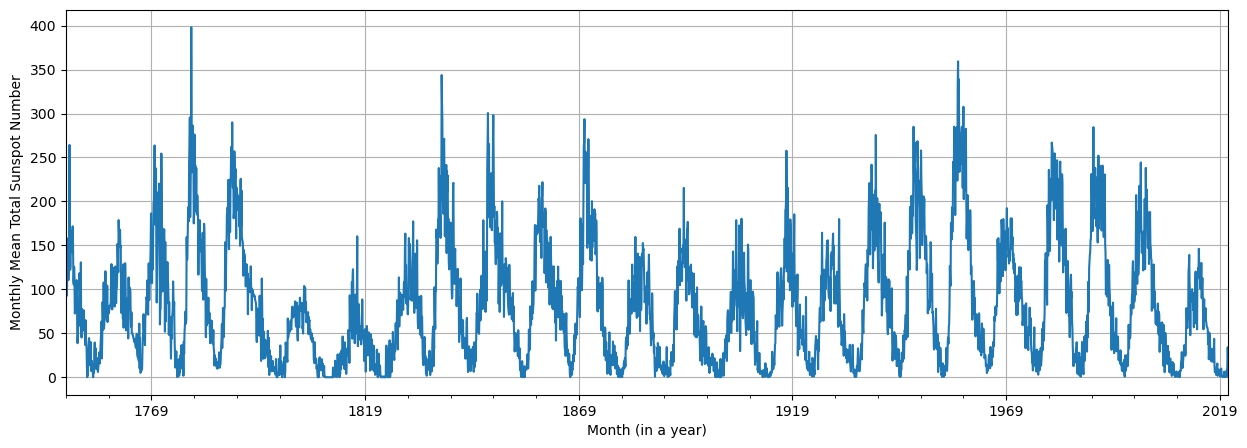

In [8]:
sunspot_data.plot(figsize = (15,5), grid = True, xlabel = 'Month (in a year)',ylabel = 'Monthly Mean Total Sunspot Number', legend = False)

Though we are trying to plot the X-axis as months in a year, the plot shows the year instead of the months. This can happen due to the large size of the data (3265 data points), hence, the plot seems to zoom out. 

After plotting a time-series plot for the variability and changes in the number of sunspots detected, we can observe that the changes do not happen randomly. Instead, we can observe some pattern in the changes. There is seasonality and we can observe that the peaks happen every certain time intervals. This plot explicitly describes the solar cycle. 

In the above plot, the data points are described by lines, which make it quite difficult to read. Hence, we try to replace it with dots. 

<Axes: xlabel='Month (in a year)', ylabel='Monthly Mean Total Sunspot Number'>

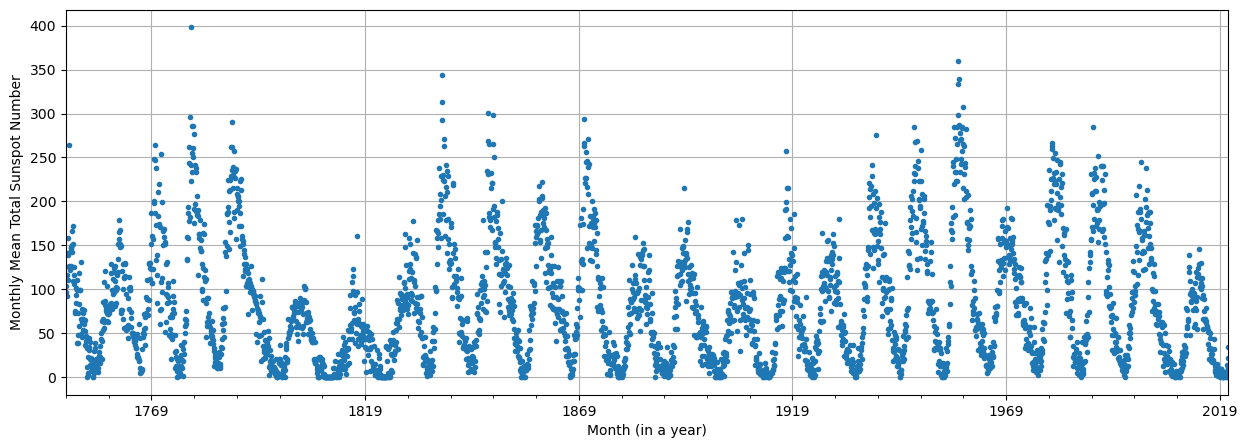

In [9]:
sunspot_data.plot(figsize = (15,5),grid = True, xlabel = 'Month (in a year)', ylabel = 'Monthly Mean Total Sunspot Number',legend = False,style = '.')

From the above plot, now we can see clearly the density of the points near each points. We can clearly observe that the data density is observed to be higher around the local minima and it tends to spread around the local maxima. This regularity triggers us to imply that the change in sunspots numbers (which correlate to the intensity of solar activities) is large and quick around the local maxima if we compare it to the change around the local minima. 

After acknowledging that the intensity of solar activities is not random and seasonality is observable in their changes, we can then predict the period of the variability of the sunspot numbers. In order to achieve that, we will make use of lag plots. Lag plots are essential in checking whether the data is random or not. 

plt.figure(figsize = (15,8))
axis = pd.plotting.lag_plot(sunspot_data)
axis.set_xlabel('Monthly Mean Total Sunspot Number in a month')
axis.set_ylabel('Monthly Mean Total Sunspot Number in the correspondingly next month')
axis.set_title('Lag plot of sunspot numbers')

The graph explicitly shows that there is a strong relationship between the monthly mean total sunspot number in the correspondingly next month and the monthly mean total sunspot number in that month, illustrated from the positive correlation between the two. Hence, we can imply that the data is not random at all, hence, validate our conclusion drawn from observing the first plot. 

Now, we are going to zoom in a little and try to find the variation in the correlation in relation to its lags. 

Text(0.5, 1.0, 'Lag plot of sunspot numbers')

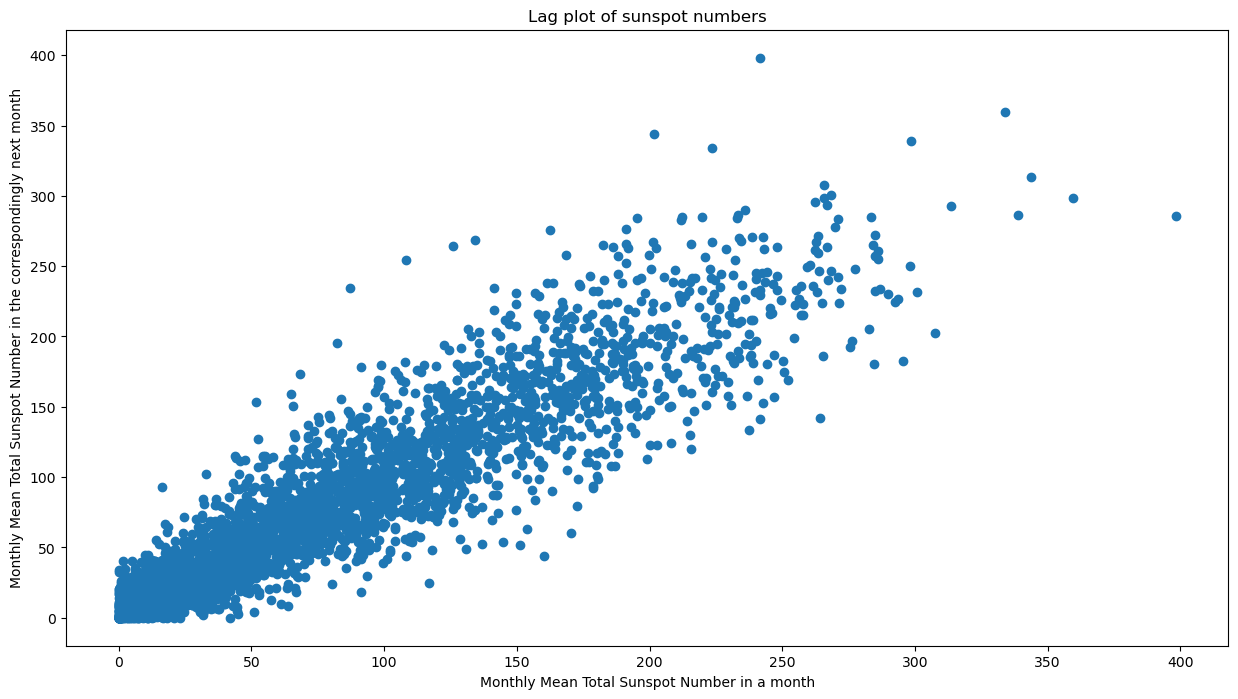

In [10]:
plt.figure(figsize = (15,8))
axis = pd.plotting.lag_plot(sunspot_data)
axis.set_xlabel('Monthly Mean Total Sunspot Number in a month')
axis.set_ylabel('Monthly Mean Total Sunspot Number in the correspondingly next month')
axis.set_title('Lag plot of sunspot numbers')

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

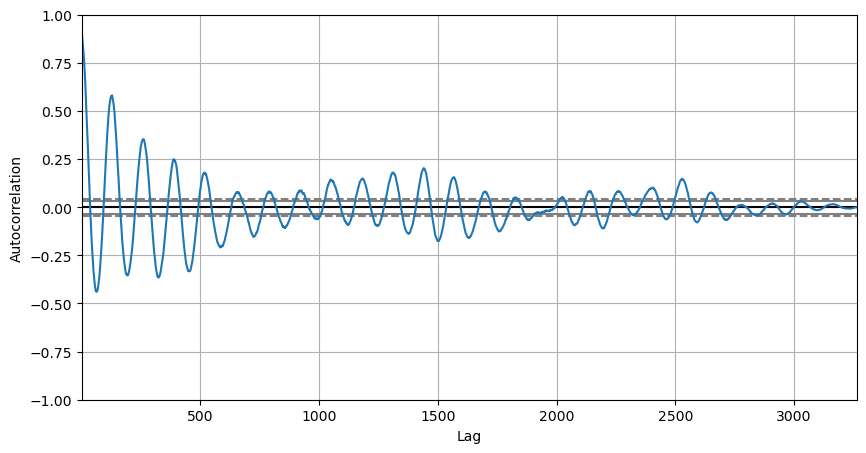

In [11]:
plt.figure(figsize = (10,5))
pd.plotting.autocorrelation_plot(sunspot_data)

In [288]:
lag_vals = np.arange(12*15)
autocorr_ser = np.array([sunspot_data['Monthly Mean Total Sunspot Number'].autocorr(lag=n) for n in lag_vals])
argrelextrema(autocorr_ser, np.greater, order = 2)[0]

array([128], dtype=int64)

From the above calculation, we can oberve that the lag is equal to about 128 months. 128 month is equal to more or less 10.67 years. Hence, from the calculation, we can predict the base value of the solar activity regularity to repeat its cycle each 10.67 years. 

The local maximum in autocorrelation plot at a lag around 1500 months is also observable, which implies that tthere is a longer season than the usual solar cycle of 11 years. Autocorrelation at this second maximum is not high, but it would be worth considering since it will reveal another season longer than 11 -year solar cycle. 

In [289]:
lag_vals = np.arange(1700)
autocorr_ser = np.array([sunspot_data['Monthly Mean Total Sunspot Number'].autocorr(lag = n) for n in lag_vals])
argrelextrema(autocorr_ser, np.greater, order = 130)[0]

array([1440], dtype=int64)

This signals the presence of a longer cycle of 1440 months, which correspond to 120 years. But, we have lower confident level about the presence of this 120 years cycle as the observation data only covers 270 years, which correspond to less than 3 cycles. 

## Levels of Solar Activity Over the Years

Now, let us take a look at the average level of solar activity in each cycle by using the rolling average. 

In [290]:
newSunspot_data = pd.read_csv("Sunspots.csv")
years = np.unique(newSunspot_data['Date'].apply(lambda x: x[:4]))
mean_sunspot = []
for year in years:
    mean_sunspot.append(newSunspot_data[newSunspot_data['Date'].apply(
        lambda x: x[:4]) == year]['Monthly Mean Total Sunspot Number'].mean())
df_sunspot = pd.DataFrame(mean_sunspot)
df_sunspot.rename(columns={0 :"Monthly Mean Total Sunspot Number"}, inplace = True)
df_sunspot.insert(0, "Year", years)
df_sunspot.set_index("Year")

,Monthly Mean Total Sunspot Number
Year,
1749,134.875000
1750,139.000000
1751,79.441667
1752,79.666667
1753,51.125000
...,...
2017,21.816667
2018,7.008333
2019,3.583333


In [291]:
rolling_avg1 = df_sunspot['Monthly Mean Total Sunspot Number'].rolling(window = 11, closed = 'both',center = True).mean()
rolling_avg1 = pd.DataFrame(rolling_avg1)
rolling_avg1.insert(0, "Year", years)
rolling_avg1.set_index("Year")
rolling_avg1.dropna(subset = "Monthly Mean Total Sunspot Number", inplace = True)
rolling_avg1 = rolling_avg1.reset_index(drop = True)
rolling_avg1

,Year,Monthly Mean Total Sunspot Number
0,1754,69.155303
1,1755,72.123611
2,1756,72.807639
3,1757,69.717361
4,1758,69.363889
...,...,...
259,2013,46.444444
260,2014,45.690278
261,2015,46.063194
262,2016,46.534028


<Axes: xlabel='Year', ylabel='11 - year moving average of the Monthly Mean Total Sunspsot Number'>

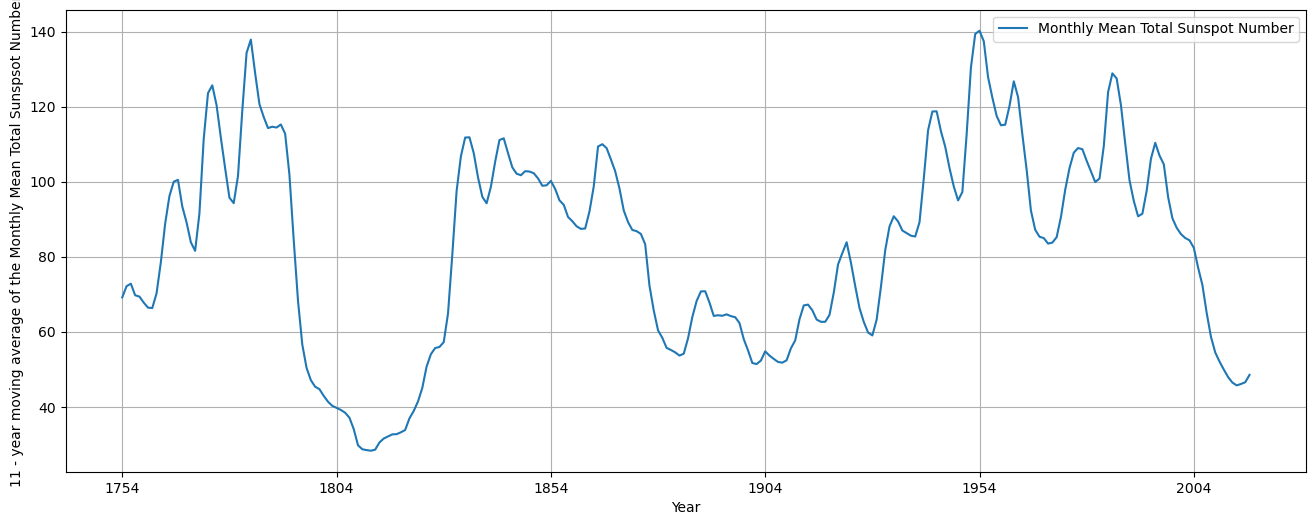

In [292]:
rolling_avg1.plot(x = "Year", figsize = (16,6),grid = True,xlabel = 'Year', ylabel = '11 - year moving average of the Monthly Mean Total Sunspsot Number')

Using rolling average, we can smoothen out the "periodical change" of the solar activity in order for us to see the underlying trend of solar activity more easily.
From the plot, we can see that there is also variability in terms of the average level of solar acitivities in each cycle. A special feature that we need to highlight is around 1790 - 1820 in which the average reaches it global minima. Astronomically, this global minima is translted into an event called Dalton Minimum, which describes the lowest solar activity that has ever taken place so far. 

Next, we are trying to take a look closely at the variation that happened in each cycle. 

<Axes: xlabel='Month (in a year)', ylabel='Monthly Mean Total Sunspot Number'>

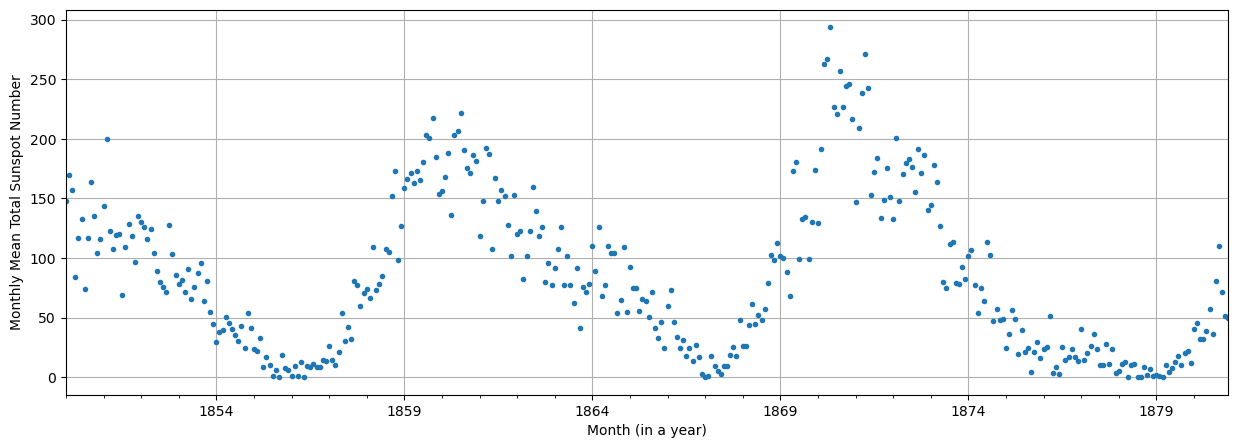

In [293]:
sunspot_data.loc['1850' : '1880'].plot(figsize = (15,5), grid = True, xlabel = 'Month (in a year)', ylabel = 'Monthly Mean Total Sunspot Number',legend  = False,style = '.')

C:\Users\Asus\AppData\Local\Temp\ipykernel_14368\3468553488.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sunspot_years[year.year] = group.values


<Axes: >

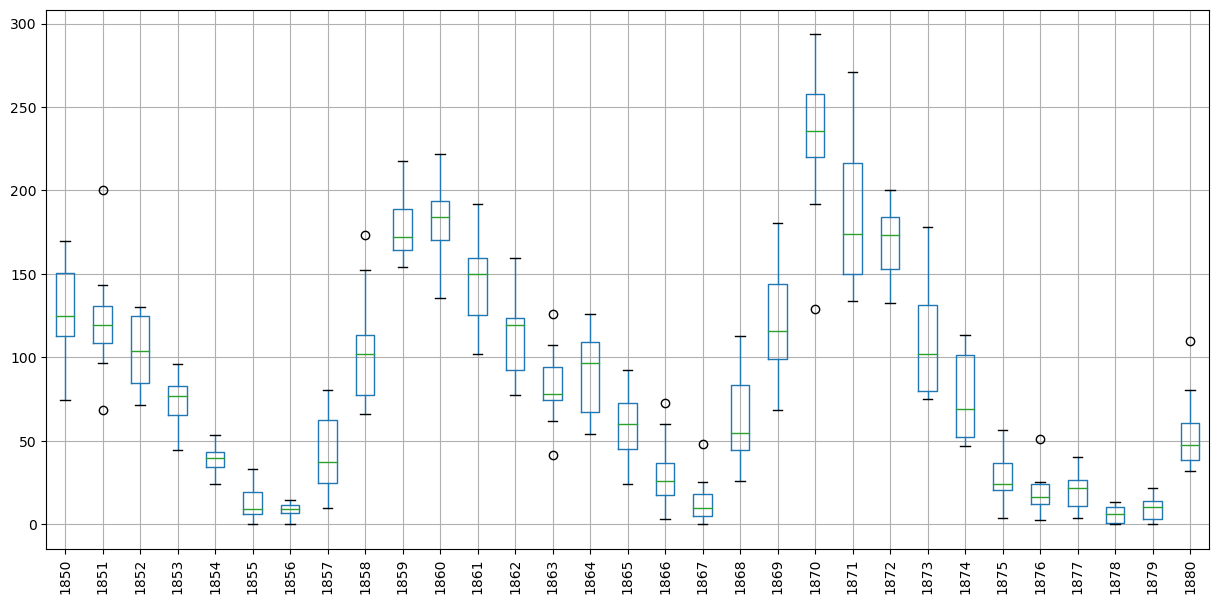

In [294]:
ser = pd.Series(sunspot_data['Monthly Mean Total Sunspot Number'].values, index = sunspot_data.index)

# We notice that in the last row in the series, 2021, has no data for months other than January. Hence, we should drop it to prevent error. 
ser = ser.drop(pd.to_datetime('2021-01-31'))
year_groups = ser.groupby(pd.Grouper(freq = 'Y'))
sunspot_years = pd.DataFrame()
for year, group in year_groups:
    sunspot_years[year.year] = group.values
sunspot_years.loc[:,1850:1880].boxplot(figsize = (15,7),rot = 90)

We can see that from the plot, the IQR of the data tends to enlarge around the local maxima and squeezes around the local minima. 

<Axes: xlabel='Year'>

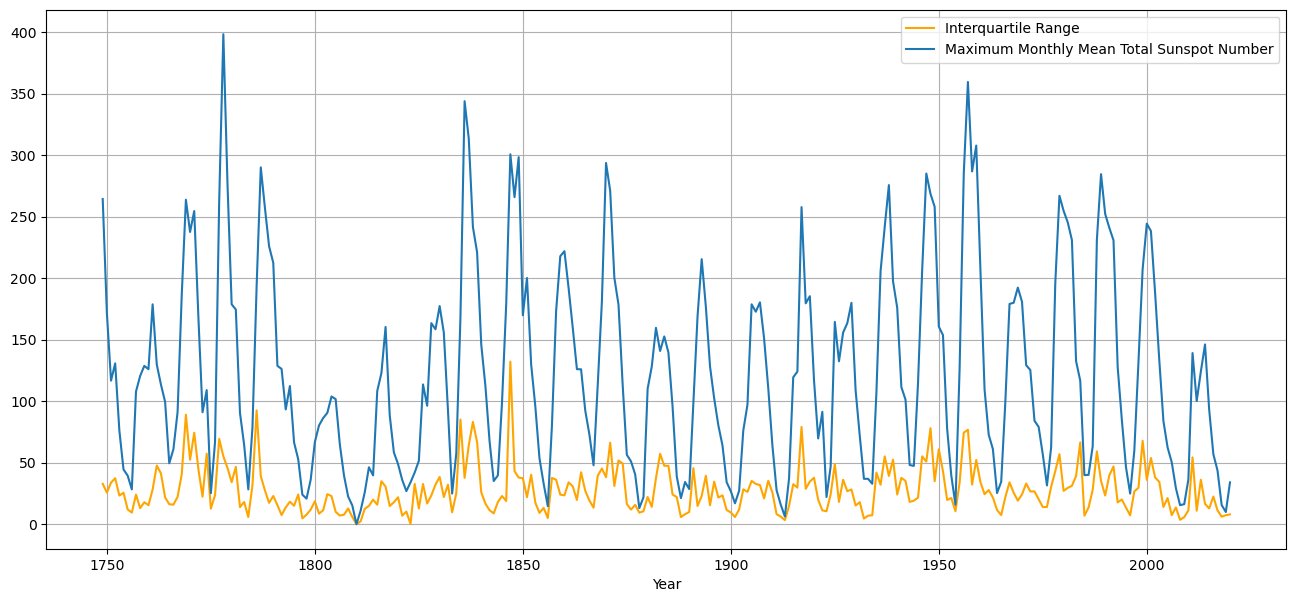

In [295]:
IQR_Range_years = sunspot_years.quantile(0.75) - sunspot_years.quantile(0.25)
IQR_Range_years.name = 'Interquartile Range'
axis = IQR_Range_years.plot(color = 'orange',legend = True)
sunspot_years_max = sunspot_years.max()
sunspot_years_max.name = 'Maximum Monthly Mean Total Sunspot Number'
sunspot_years_max.plot(ax = axis,figsize=(16,7),grid = True, xlabel = 'Year',legend = True)

Now, we can check the correlaton between IQR and the maximum value of 'Monthly Mean Total Sunspot Number'. 

In [296]:
IQR_corr = pd.DataFrame([sunspot_years.max(),IQR_Range_years]).transpose()
IQR_corr.corr()

,Unnamed 0,Interquartile Range
Unnamed 0,1.000000,0.718423
Interquartile Range,0.718423,1.000000


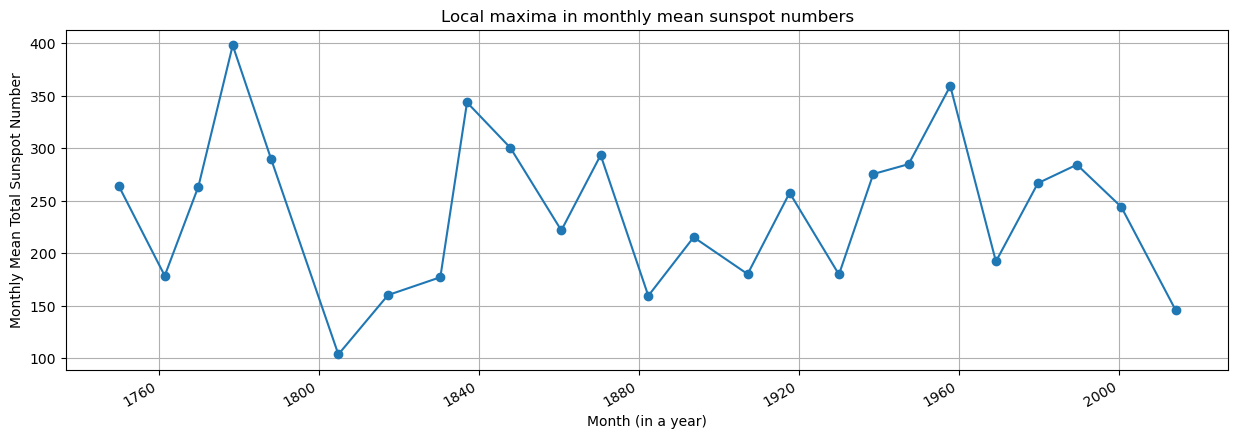

In [297]:
order = 12 * 4
argrelextrema(ser.values, np.greater, order = order)[0]
local_maxima = ser[argrelextrema(ser.values, np.greater, order = order)[0]]
ax = local_maxima.plot(grid = True, figsize=(15,5),style = 'o-',ylabel = 'Monthly Mean Total Sunspot Number',xlabel = 'Month (in a year)',title = 'Local maxima in monthly mean sunspot numbers')

In [298]:
local_maxima.count()

25

In [299]:
sunspot_cycles = local_maxima.reset_index()['Date'].dt.year.diff().dropna()
sunspot_cycles

1     12.0
2      8.0
3      9.0
4      9.0
5     17.0
6     13.0
7     13.0
8      6.0
9     11.0
10    13.0
11    10.0
12    12.0
13    11.0
14    14.0
15    10.0
16    12.0
17     9.0
18     9.0
19    10.0
20    12.0
21    10.0
22    10.0
23    11.0
24    14.0
Name: Date, dtype: float64

In [300]:
sunspot_cycles.describe()

count    24.000000
mean     11.041667
std       2.330873
min       6.000000
25%       9.750000
50%      11.000000
75%      12.250000
max      17.000000
Name: Date, dtype: float64

Hence, we can take the average value and use it as a number to describe the period of a solar cycle, which is 11.04 years. 

# SUN ACTIVITY AND GLOBAL TEMPERATURE

From the cleaning and exploratory data analysis of the Sunspot dataset, we have succesfully gained insight into some characteristics of the Sunspot. The most crucial aspect of the sunspot data analysis is its 11-year pattern. We wil be using this pattern and observe its correlation to Earth's global temperature.

## Preparing global temperature data

The temperature data comes in monthly data, we will process it and obtain the average of each year.

In [301]:
global_temp = pd.read_csv("GlobalTemperatures.csv")
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
df_global = pd.DataFrame(mean_temp_world)
df_global.rename(columns={0 :"LandAvgTemperature"}, inplace = True)
df_global.insert(0, "Year", years)
df_global

,Year,LandAvgTemperature
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333
...,...,...
261,2011,9.516000
262,2012,9.507333
263,2013,9.606500
264,2014,9.570667


## Visualisation of Global Temperature Over the Years

<Axes: xlabel='Year', ylabel='Average Global Land Temperature'>

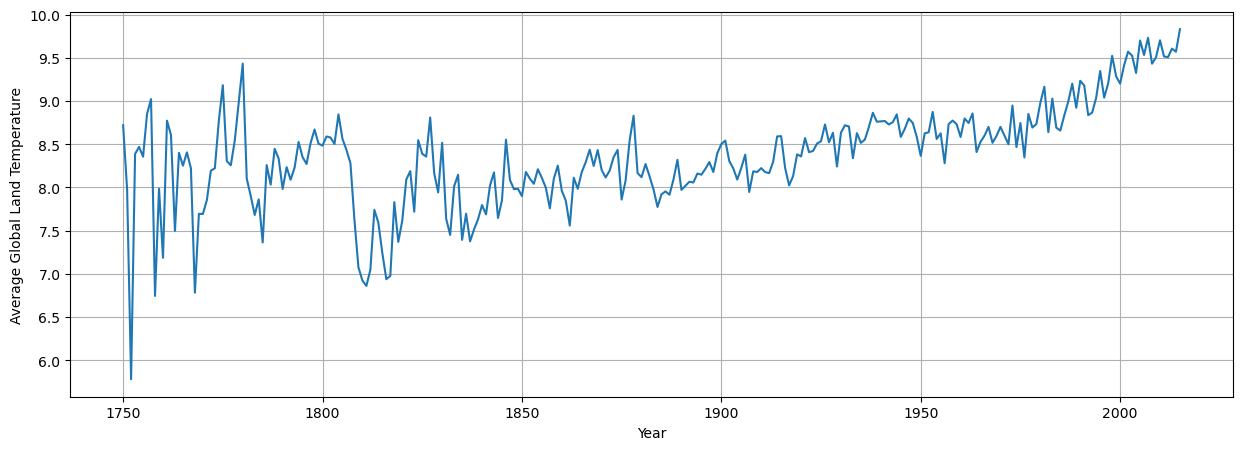

In [302]:
df_global.plot(x = 'Year', figsize = (15,5), grid = True, xlabel = 'Year',ylabel = 'Average Global Land Temperature', legend = False)

## Comparing Solar Activity Level and Average Global Temperature

<Axes: xlabel='Month (in a year)', ylabel='11 - year moving average of the Monthly Mean Total Sunspsot Number'>

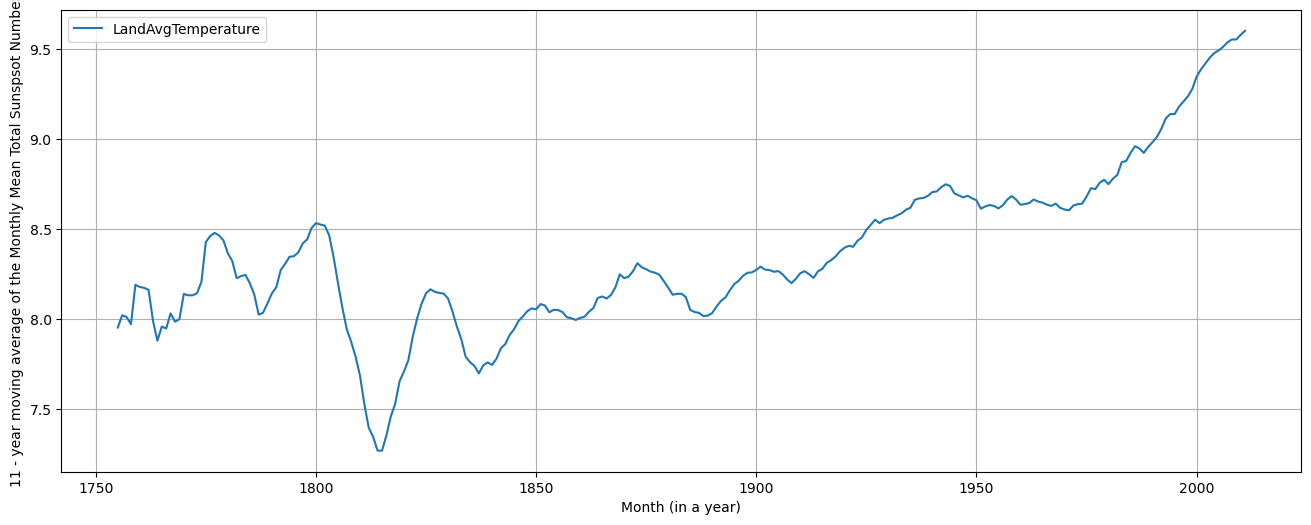

In [303]:
rolling_avg = df_global['LandAvgTemperature'].rolling(window = 11, closed = 'both',center = True).mean()
rolling_avg = pd.DataFrame(rolling_avg)
rolling_avg.insert(0, "Year", years)
rolling_avg.set_index("Year")
rolling_avg.plot(x = 'Year', figsize = (16,6),grid = True,xlabel = 'Month (in a year)', ylabel = '11 - year moving average of the Monthly Mean Total Sunspsot Number')

Similar to how rolling average were used to smoothen out the solar activity level, rolling graph is also used here to smoothen out the Global Temperature graph with the same 11 years width.

In [304]:
rolling_avg = pd.DataFrame(rolling_avg)
rolling_avg

,Year,LandAvgTemperature
0,1750,NaN
1,1751,NaN
2,1752,NaN
3,1753,NaN
4,1754,NaN
...,...,...
261,2011,9.603379
262,2012,NaN
263,2013,NaN
264,2014,NaN


In [305]:
rolling_avg.dropna(subset = "LandAvgTemperature", inplace = True)
rolling_avg = rolling_avg.reset_index(drop = True)
rolling_avg

,Year,LandAvgTemperature
0,1755,7.952160
1,1756,8.020521
2,1757,8.011116
3,1758,7.971167
4,1759,8.189542
...,...,...
252,2007,9.538681
253,2008,9.554674
254,2009,9.554694
255,2010,9.580146


### Temperature vs Sunspot Graph

The following graph will contain the average global land temperature (red) and number of sunspots, AKA solar activity level (blue). The X-axis indicates year, the left Y-axis indicates number of sunpot, and the right Y-axis indicates temperature in °C.

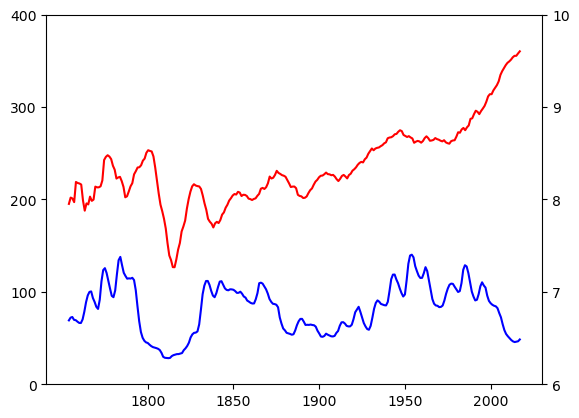

In [416]:
fig=plt.figure()
ax1=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax1.plot(rolling_avg1['Year'],rolling_avg1['Monthly Mean Total Sunspot Number'],color='b', label='1' )
ax1.set_xticks(['1800', '1850', '1900', '1950', '2000'])
ax1.set_yticks([0, 100, 200, 300, 400])

ax2.plot(rolling_avg['Year'],rolling_avg['LandAvgTemperature'],color='r', label='2')
ax2.set_xticks([])
ax2.set_yticks([6, 7, 8, 9, 10])
ax2.yaxis.tick_right()



### Observation:

From the comparison between the average global temperature (Top graph) and the solar activity level (Bottom graph), one striking similarity is the previously mentioned "Dalton minimum", which is the LOW NUMBER OF SUNSPOTS (thus low solar activity) which occured in 1800s, observed as a deep dip of the graph. The same can be observed in the Average Global Temperature graph in 1800, which suggets some correlation. In fact, this correlation will be further analyzed later. Overall it can be seen that the fluctuations of solar activity is reflected on the average global temperature, except for 1960 onwards. Take a good look on the following zoomed graph:

### Same graph, but 1960-2011

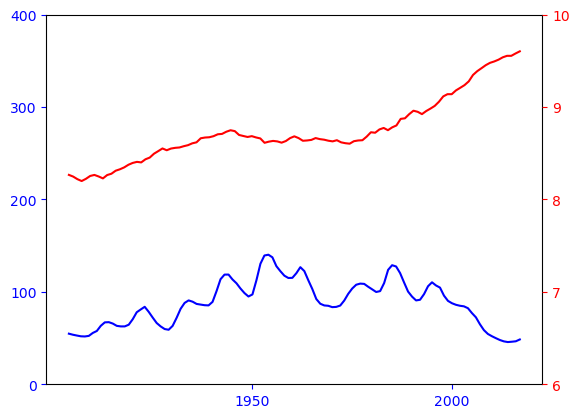

In [445]:
fig=plt.figure()
ax1=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax1.plot(rolling_avg1['Year'][150:],rolling_avg1['Monthly Mean Total Sunspot Number'][150:],color='b', label='1' )
ax1.set_xticks(['1950', '2000'])
ax1.set_yticks([0, 100, 200, 300, 400])
ax1.tick_params(axis='x', colors="b")
ax1.tick_params(axis='y', colors="b")

ax2.plot(rolling_avg['Year'][150:],rolling_avg['LandAvgTemperature'][150:],color='r', label='2' )
ax2.set_xticks([])
ax2.set_yticks([6, 7, 8, 9, 10])
ax2.yaxis.tick_right()
ax2.tick_params(axis='x', colors="r")
ax2.tick_params(axis='y', colors="r")

It can clearly be seen that from around 1960s, solar activity level goes down. It is expected that the temperature goes down, following the pattern. However, the data shows that temperature increased. This suggests that there may be another factor that causes this break in pattern. We will move on to calculate the correlation for these observations.

## Correlation Value Between Solar Activity and Average Global Temperature

Given that there is a break in correlation between Solar Activity and Average Global Temperature in the period 1960-current (implying some other factor that contributes to change in global temperature), we will partition the data into the period of 1755-1960 and 1960-2011, and calculate the correlation coefficient correspondingly.

In [309]:
comp_df = pd.DataFrame()
comp_df.insert(0,'Monthly Mean Total Sunspot Number',rolling_avg1['Monthly Mean Total Sunspot Number'][:256])
comp_df.insert(1,'Land Average Temperature',rolling_avg['LandAvgTemperature'])
comp_df.insert(2,'Year',rolling_avg['Year'])
comp_df

,Monthly Mean Total Sunspot Number,Land Average Temperature,Year
0,69.155303,7.952160,1755
1,72.123611,8.020521,1756
2,72.807639,8.011116,1757
3,69.717361,7.971167,1758
4,69.363889,8.189542,1759
...,...,...,...
251,77.083333,9.513167,2006
252,72.467361,9.538681,2007
253,65.015972,9.554674,2008
254,58.634722,9.554694,2009


### Period 1: 1755 - 1960

<Axes: >

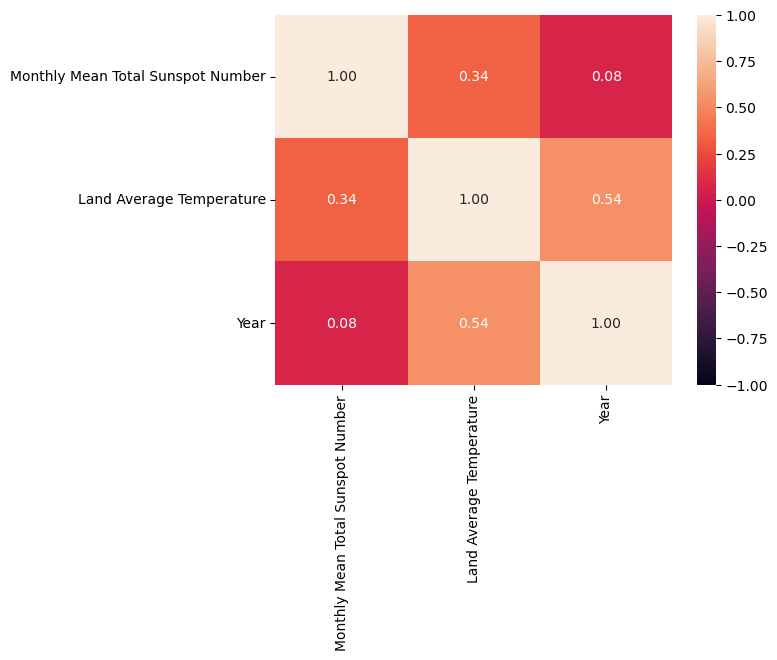

In [310]:
df1 = comp_df[:205]
sb.heatmap(df1.corr(),vmin=-1,vmax=1,annot=True,fmt='.2f')

The correlation between solar activity and average global land temperature in the first period (1755-1960) is 0.34. So there is a positive correlation between both data.

### Period 2: 1960 - 2011

<Axes: >

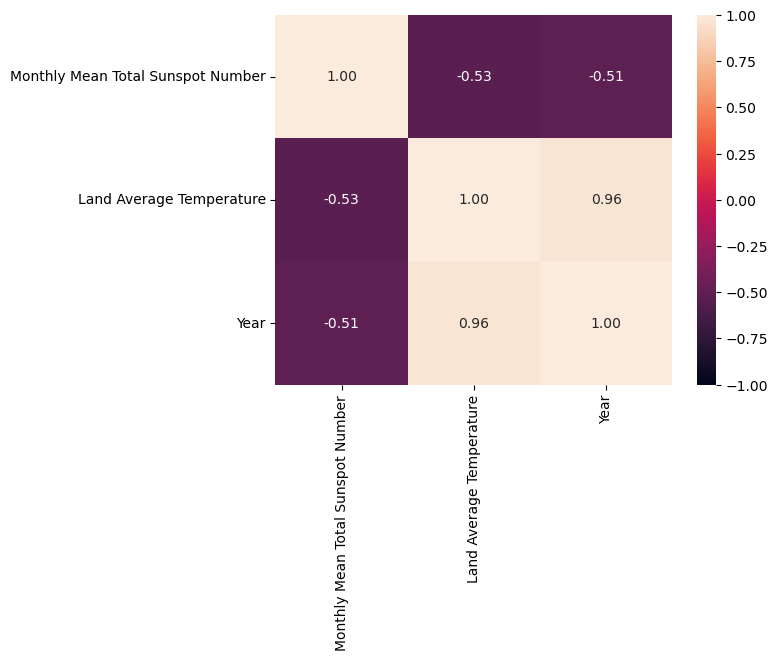

In [311]:
df2 = comp_df[205:]
sb.heatmap(df2.corr(),vmin=-1,vmax=1,annot=True,fmt='.2f')

On the other hand, in period 2 (1960-2011), solar activity and average global land temperature seems to have a negative correlation of -0.51. This is a stark contrast with the positive correlation shown in period 1. This negative correlation describes how form 1960s onwards, whilst solar activity descreases, average global land temperature incresases, defying the previous trend.

This seemingly "high" ngeative correlation however, cannot be taken immediately as a correlation between Solar activity and global temperature. In fact, we hypothesize that another factor comes into stage, causing this shift in trend. This new factor is the level of global CO2 emission. As such, let us explore the CO2 global emission dataset.

## Carbon Dioxide Data Exploration

In [312]:
co2_data = pd.read_csv('annual-co2-emissions-per-country.csv')
co2_df = pd.DataFrame(co2_data[co2_data['Entity'].apply(lambda x: x) == "World"]['Annual CO₂ emissions'])
co2_df = co2_df.reset_index(drop = True)
co2_df.insert(0,'Year', range(1750,2023))
co2_df

,Year,Annual CO₂ emissions
0,1750,9.305937e+06
1,1751,9.407229e+06
2,1752,9.505168e+06
3,1753,9.610490e+06
4,1754,9.733580e+06
...,...,...
268,2018,3.676694e+10
269,2019,3.704010e+10
270,2020,3.500774e+10
271,2021,3.681654e+10


<Axes: xlabel='Year', ylabel='CO₂ Emission in Tonnes'>

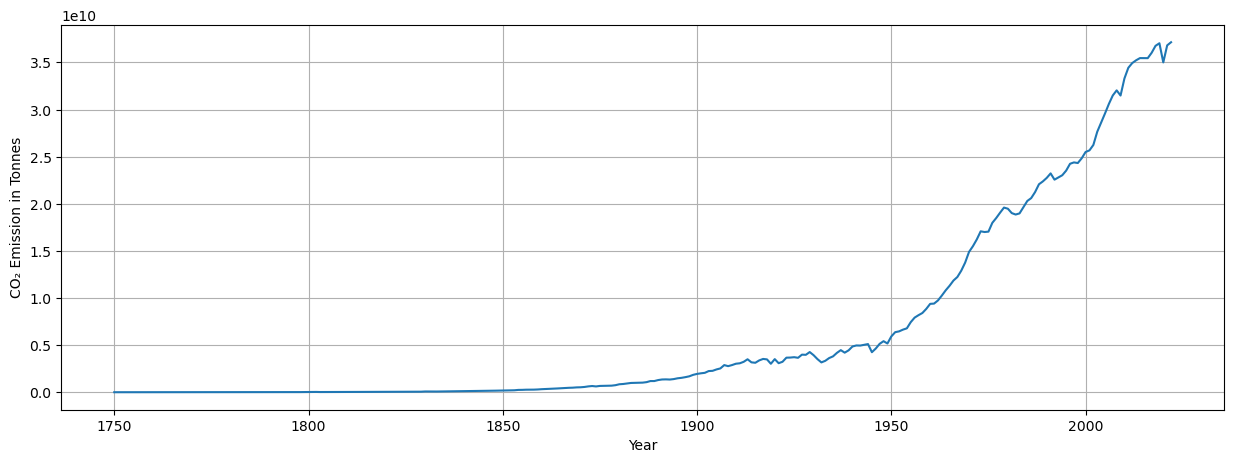

In [313]:
co2_df.plot(x = 'Year',figsize = (15,5), grid = True, xlabel = 'Year',ylabel = 'CO₂ Emission in Tonnes', legend = False)

The graph above shows the level of global CO2 emission from 1750 until 2022. It can clearly be seen that there has been an accelerating increase in Carbon Dioxide usage in the 20th century.

Overall, the graph can be seen in 3 stages. During the first period (1750-1850), CO2 emission level was very low, close to negligible. In the second period (1850-1950), there is an increase in CO2 emission, rising steadily at a certain speed. In the third period (1950-2022), the increase in CO2 emission accelerated, making a steep graph.

### CO2's effect on Temperature Increase in 1950 onwards

The third period (1950-2011) where global CO2 emission increased drastically, coincides with the period where average global temperature increased, not follwing the usual pattern of solar activity. The following graph illustrates this observation.

In [331]:
co2_plot = co2_df[5:261]

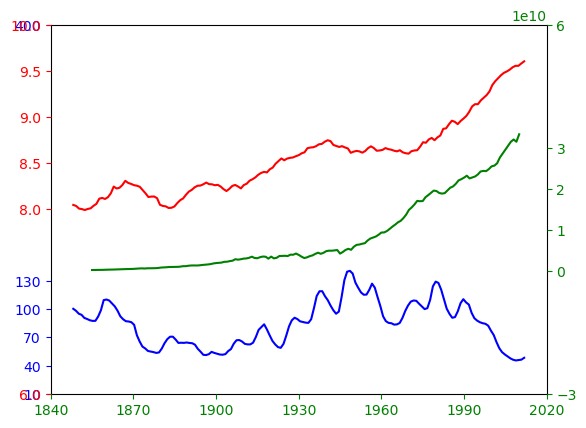

In [443]:
fig=plt.figure()
ax1=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax3=fig.add_subplot(111, label="3", frame_on=False)

ax1.plot(rolling_avg1['Year'][100:],rolling_avg1['Monthly Mean Total Sunspot Number'][100:],color='b', label='1' )
ax1.set_xticks([])
ax1.set_yticks([10, 40 ,70, 100, 130, 400])
ax1.tick_params(axis='x', colors="b")
ax1.tick_params(axis='y', colors="b")

ax2.plot(rolling_avg['Year'][100:],rolling_avg['LandAvgTemperature'][100:],color='r', label='2' )
ax2.set_xticks([])
ax2.set_yticks([6, 8, 8.5, 9, 9.5, 10])
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='x', colors="r")
ax2.tick_params(axis='y', colors="r")

ax3.plot(co2_plot['Year'][100:],co2_plot['Annual CO₂ emissions'][100:],color='g', label='3' )
ax3.set_xticks([1840, 1870, 1900, 1930, 1960, 1990, 2020])
ax3.set_yticks([-3*10**10, 0, 1*10**10, 2*10**10,3*10**10, 6*10**10])
ax3.yaxis.tick_right()
ax3.tick_params(axis='x', colors="g")
ax3.tick_params(axis='y', colors="g")

The graph above contains:
-Red line : Average global land temperature (left red Y-axis denotes Temperature in °C)
-Green line : Global CO2 emission (right green Y-axis denotes emission in 10^10 Tonnes)
-Blue line : Number of sunspots AKA solar activity level (left blue Y-axis denotes the number of sunspots)
-X-axis denotes years.

It can be seen that up until the year 1960s, average global temperature fluctuates similarly to solar activity. From 1960s thereafter, global CO2 emission increased steeply, and average global temperature follows this trend, whilst solar activity goes down.

### Correlation Coefficient of CO2 emissions and Temperature

<Axes: >

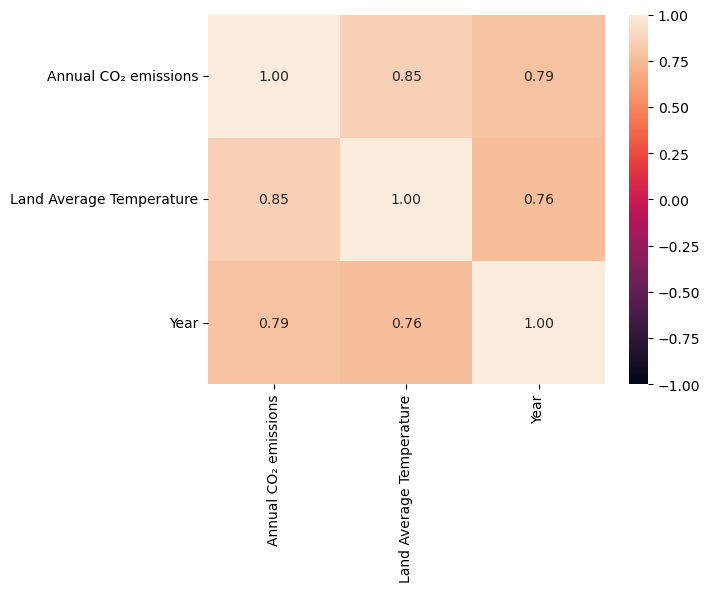

In [452]:
comp_df2 = pd.DataFrame()
comp_df2.insert(0,'Annual CO₂ emissions',co2_df['Annual CO₂ emissions'])
comp_df2.insert(1,'Land Average Temperature',rolling_avg['LandAvgTemperature'])
comp_df2.insert(2,'Year',rolling_avg['Year'])
comp_df2

sb.heatmap(comp_df2.corr(),vmin=-1,vmax=1,annot=True,fmt='.2f')

As expected, the correlation coefficient between CO2 emission and average global temperature is very high (0.85), meaning that CO2 emission level impacts global temperature more than the change in solar activitylevels.

We can conclude from the analysis that there are several factors towards the change in our global temperature:
1.Solar activity level: can be observed from number of sunspots, contributes to the "fluctuating" changes in global temperature as observed in 1800s-1900s.
2.CO2 emission level: increase in CO2 emission in 20th century had a huge effect in the increase in global temperature, given its high positive correlation.

The result to the observation makes sense, especialy the fact that CO2 contributes as a greenhouse gas that traps heat and increase our planet's temperature. In our current era, CO2 emission hold a more prevalent contribution towards our climate change.

# Prediction of Global Temperature Value : The Utilization of Linear Regression

After assessing the correlation between the value of the global temperature and the two independent variables (in this case : the solar activities and the level of global carbon emission), now let us level up our analysis to predict the global temperature using these 2 variables. 

First of all, we will prepare the data that will be used for the linear regression. In this case, we will partition the data into the part that contains no NaN values. 

In [449]:
EntryData_Sunspot = rolling_avg1[0:257]
EntryData_Temp = rolling_avg
EntryData_CO2 = co2_df
EntryData_Sunspot

,Year,Monthly Mean Total Sunspot Number
0,1754,69.155303
1,1755,72.123611
2,1756,72.807639
3,1757,69.717361
4,1758,69.363889
...,...,...
252,2006,72.467361
253,2007,65.015972
254,2008,58.634722
255,2009,54.468056


Following the prior step, we then build to collect all of the data that needs to be used into one set of data. 

In [450]:
newDF = pd.DataFrame()
newDF.insert(0,'Monthly Mean Total Sunspot Number',EntryData_Sunspot['Monthly Mean Total Sunspot Number'])
newDF.insert(1,'Carbon Emission',EntryData_CO2['Annual CO₂ emissions'])
newDF.insert(2,'LandAvgTemperature',EntryData_Temp['LandAvgTemperature'])
newDF

,Monthly Mean Total Sunspot Number,Carbon Emission,LandAvgTemperature
0,69.155303,9.305937e+06,7.952160
1,72.123611,9.407229e+06,8.020521
2,72.807639,9.505168e+06,8.011116
3,69.717361,9.610490e+06,7.971167
4,69.363889,9.733580e+06,8.189542
...,...,...,...
252,72.467361,2.624829e+10,9.538681
253,65.015972,2.764865e+10,9.554674
254,58.634722,2.862019e+10,9.554694
255,54.468056,2.959210e+10,9.580146


Then, the data is ready to be analysed. Before we build the model, we split the data into two sets, namely train set and test set. We allocate 75% of the provided data to train the model and 25% to evaluate the performance of the model built. 

Intercept of Regression 	: b =  [7.99791455]
Coefficients of Regression 	: a =  [[1.56921653e-03 4.94460155e-11]]

                          Predictors  Coefficients
0  Monthly Mean Total Sunspot Number  1.569217e-03
1                    Carbon Emission  4.944602e-11



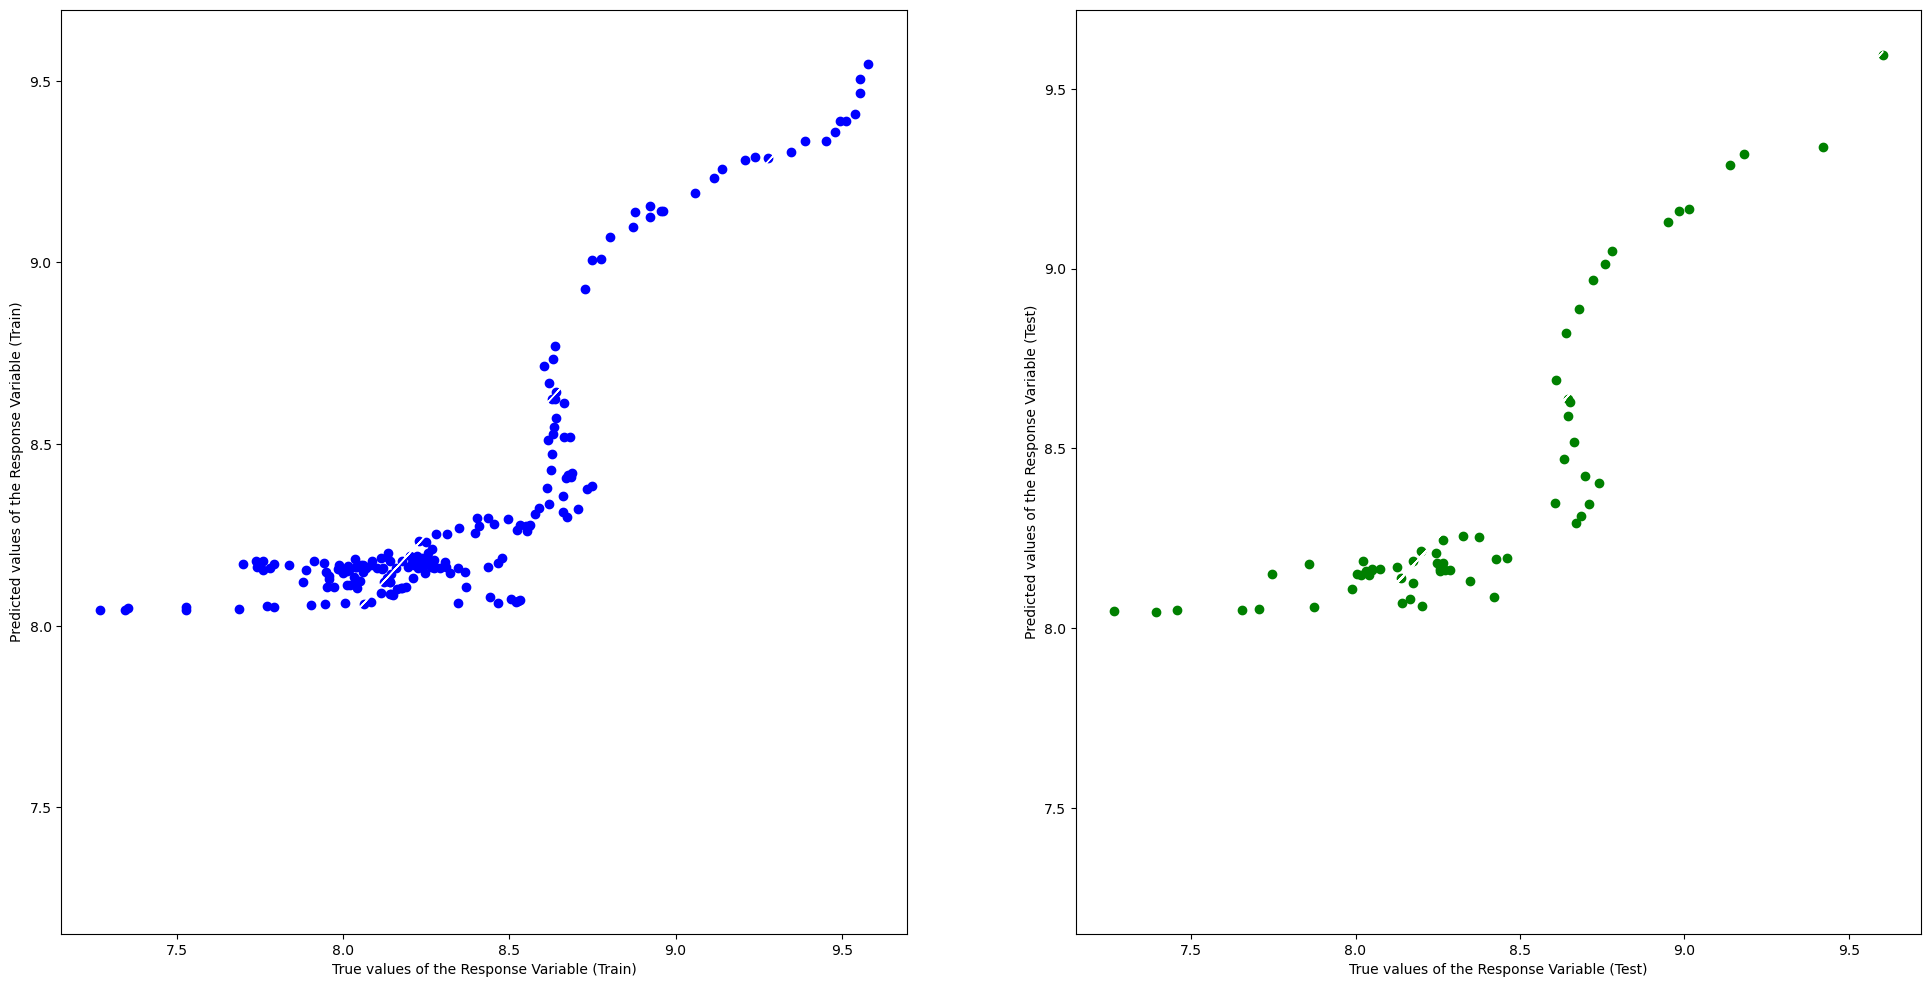

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7555984655445439
Mean Squared Error (MSE) 	: 0.04776610847209533

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7207164277356004
Mean Squared Error (MSE) 	: 0.05637625102464322



In [451]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Extract Response and Predictors
y = pd.DataFrame(rolling_avg["LandAvgTemperature"])
X = pd.DataFrame(newDF[['Monthly Mean Total Sunspot Number','Carbon Emission']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Hence, the linear model is developed with certain coefficients. According to the goodness of fit of the model values, we can see how the explained variance is quite high and at the same time, the mean squared error is quite low. It reflects how our model is quite accurate. 